In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# DATA EXPLORATION

---
## Load Data

In [2]:
beer_file = r'../data/bigData/beers.csv'
breweries_file = r'../data/bigData/breweries.csv'

beers = pd.read_csv (beer_file)

breweries = pd.read_csv (breweries_file)
breweries.rename(columns={'id':'brewery_id'},inplace=True)

reviews = pd.read_csv (r"../data/bigData/reviews.csv")

## print columns and size

In [3]:
print(beers.columns)
print("beers=" , beers.shape[0])

Index(['id', 'name', 'brewery_id', 'state', 'country', 'style', 'availability',
       'abv', 'notes', 'retired'],
      dtype='object')
beers= 358873


In [ ]:
print(breweries.columns)
print("n_breweries = ",breweries.shape[0])

In [4]:
print(reviews.columns)
print("n_reviews = ",reviews.shape[0])

Index(['beer_id', 'username', 'date', 'text', 'look', 'smell', 'taste', 'feel',
       'overall', 'score'],
      dtype='object')
n_reviews =  9073128


In [ ]:
swiss_beers = beers[beers["country"]]

### Join Breweries and beer

In [ ]:
beer_and_breweries = pd.merge(beers,breweries,on="brewery_id")
beer_and_breweries.rename(columns={'name_x':'beerName','name_y':'brewName'},inplace=True)

In [ ]:
#remove beers (free memory)
del(beers)

---
### Preview

In [7]:
reviews_score = reviews[["beer_id","score"]].groupby("beer_id").mean()
reviews = reviews[["beer_id","score"]].groupby("beer_id").count()

In [24]:
best_idx = reviews_score.groupby(["country"])["score"].transform(max) == reviews_score["score"]
bests = reviews_score[best_idx]
bests.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,score
332,256314,Pilsen Paraguaya,34106,NaN,PY,German Pilsner,Year-round,5.0,No notes at this time.,f,2.79
1010,121330,Stout Au Bouleau,13905,QC,CA,Irish Dry Stout,Year-round,4.9,No notes at this time.,f,5.00
2198,263893,Belfast Lager,38754,OR,US,Vienna Lager,Year-round,4.5,No notes at this time.,f,5.00
2694,81826,Iwatekura Barleywine,4974,NaN,JP,American Barleywine,Year-round,14.3,No notes at this time.,f,4.87
2937,368158,Hipster in a Vanilla Field,48831,CA,US,Russian Imperial Stout,Rotating,10.0,No notes at this time.,f,5.00


In [14]:
popularity_idx = reviews.groupby(["country"])["score"].transform(max) == reviews["score"]
pop = reviews[popularity_idx]
pop.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired,score
332,256314,Pilsen Paraguaya,34106,NaN,PY,German Pilsner,Year-round,5.0,No notes at this time.,f,1
2564,2476,Castle Lager,466,NaN,ZA,American Adjunct Lager,Year-round,5.0,No notes at this time.,f,154
5267,75488,Mamba,27346,NaN,CI,American Malt Liquor,Year-round,NaN,No notes at this time.,f,9
7657,34,La Fin Du Monde,22,QC,CA,Belgian Tripel,Year-round,9.0,La Fin du Monde was developed through 18 month...,f,10295
9700,5181,Club Premium Lager,1487,NaN,GH,American Adjunct Lager,Year-round,5.0,No notes at this time.,f,11


In [34]:
code = "DE"
print("\n BESTS:")
print(bests[bests["country"] == code][["name","style","score"]])
print("\n Pop:")
print(pop[pop["country"] == code][["name","style","score"]])


 BESTS:
                             name                      style  score
7522                 Gastro-Weiße          German Hefeweizen    5.0
38700                 Best Bitter             English Bitter    5.0
49274    Wiesbadener Double Stout    American Imperial Stout    5.0
127573          Erlkönig Pilsener             German Pilsner    5.0
138790       Griess Bock Hefetrüb                German Bock    5.0
139182    Rhöner Imperial Pilsner  American Imperial Pilsner    5.0
209372  Wiesbadener 1486 Pale Ale    American Pale Ale (APA)    5.0
212868     Wiesbadener Summer Ale    American Pale Ale (APA)    5.0

 Pop:
                                name              style  score
32034  Weihenstephaner Hefeweissbier  German Hefeweizen   8669


---
# Analysis

### Repartition of the reviews

On the x axis you have the number of reviews and on the y axis the number of beer that have this many reviews (in log scale).
Hence this is the density of beers on the reviews axis.
We can see that most of the beers only have really few number of reviews. (between 0 and 50) since a only few beers has more than 2000 reviews

[]

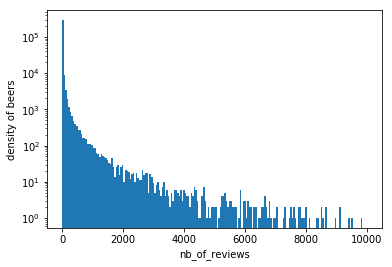

In [69]:
r_by_beers = reviews[["beer_id","score"]].groupby("beer_id").count()

bins = np.linspace(0,10000,200)
plt.hist(r_by_beers["score"],bins,log=True)
plt.xlabel("nb_of_reviews")
plt.ylabel("density of beers")
plt.plot()

Same graph but zoomed for beers with less than 100 reviews

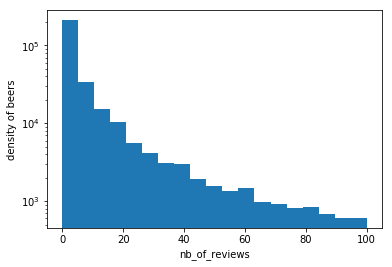

In [70]:
bins = np.linspace(0,100,20)
plt.hist(r_by_beers["score"],bins,log=True)
plt.xlabel("nb_of_reviews")
plt.ylabel("density of beers")
plt.plot()
del(r_by_beers)

### Repartition of styles of beers

In [1]:
n_styles = beer_and_breweries[["style","beerName"]].groupby("style").count()
n_styles_enough= n_styles["beerName"] > 5000
sum_tot = n_styles.sum()

n_styles = n_styles[n_styles_enough]
n_others = sum_tot - n_styles.sum()
n_styles.loc["other"] = [n_others]
plt.figure(figsize=(10,8))
plt.pie(n_styles["beerName"],labels=n_styles.index)

plt.plot()
del(n_styles)
del(n_styles_enough)

NameError: name 'beer_and_breweries' is not defined